In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler

# Load dataset (update file path if needed)
df = pd.read_csv("sales_data_with_discounts.csv")

# Clean column names
df.columns = df.columns.str.strip()

print("Shape of dataset:", df.shape)
display(df.head())

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Shape of dataset: (450, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770



Numeric columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [11]:
# Check missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing_counts[missing_counts > 0])

# Handle missing values:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter handling missing values:")
print(df.isna().sum().sum(), "missing values remain.")


Missing values per column:


Series([], dtype: int64)


After handling missing values:
0 missing values remain.


In [12]:
# Descriptive Analytics for Numerical Columns
# Mean, Median, Std, Mode
desc_stats = df[num_cols].agg(["mean", "median", "std"]).T
desc_stats["mode"] = df[num_cols].mode().iloc[0]
print("Descriptive statistics for numerical columns:")
display(desc_stats)

# Interpretation example
for col in num_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    print(f"{col}: mean={mean_val:.2f}, std={std_val:.2f} → "
          f"{'high spread' if std_val > mean_val/2 else 'low spread'}")


Descriptive statistics for numerical columns:


,mean,median,std,mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


Volume: mean=5.07, std=4.23 → high spread
Avg Price: mean=10453.43, std=18079.90 → high spread
Total Sales Value: mean=33812.84, std=50535.07 → high spread
Discount Rate (%): mean=15.16, std=4.22 → low spread
Discount Amount: mean=3346.50, std=4509.90 → high spread
Net Sales Value: mean=30466.34, std=46358.66 → high spread


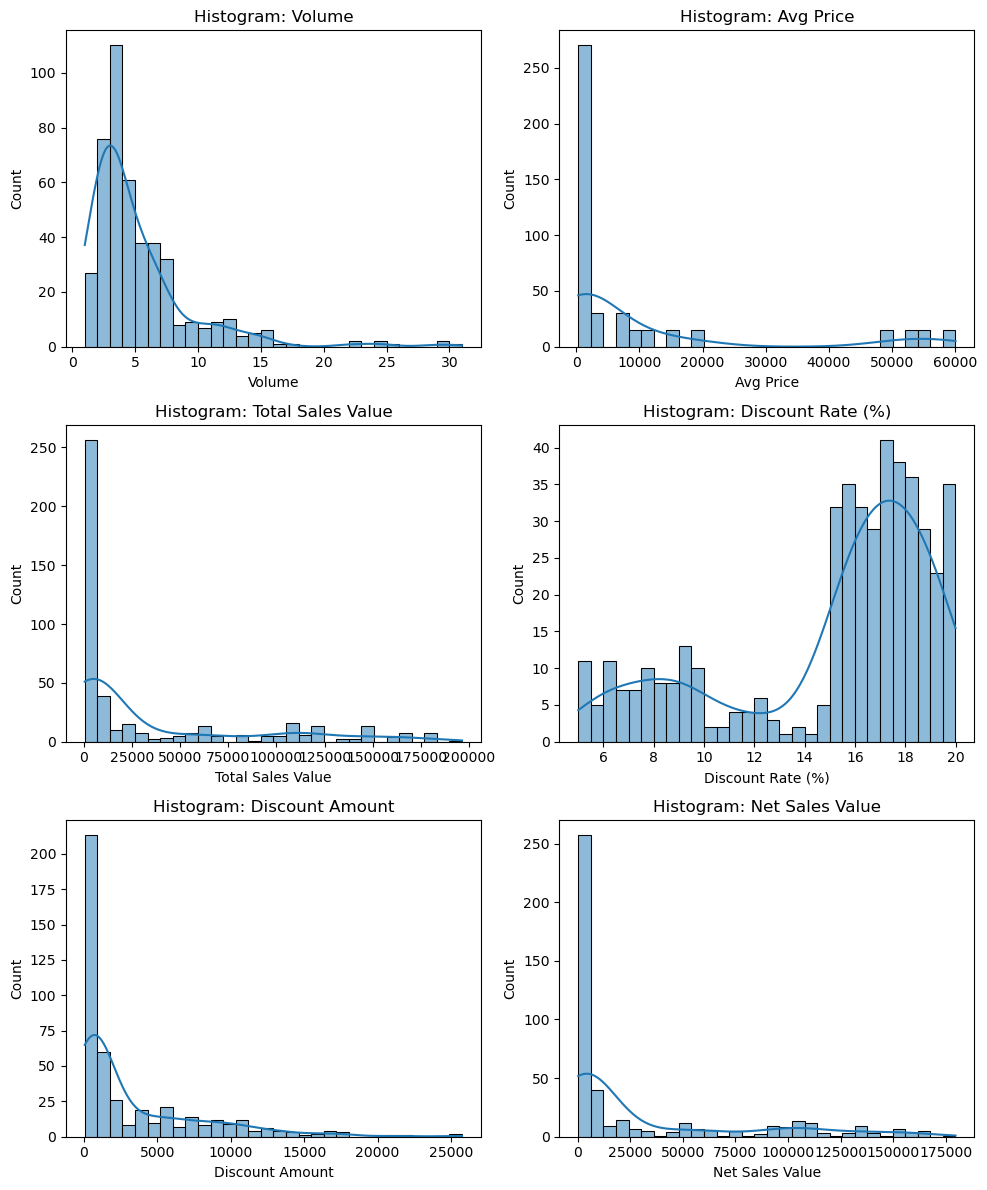


Interpretation:
- Right-skewed distributions indicate many small values with a few very large ones.
- Symmetric/bell-shaped curves suggest normal distribution.


In [13]:
# Histograms for Numerical Columns
n = len(num_cols)
rows = math.ceil(math.sqrt(n))
cols = math.ceil(n / rows)

plt.figure(figsize=(5*cols, 4*rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Right-skewed distributions indicate many small values with a few very large ones.")
print("- Symmetric/bell-shaped curves suggest normal distribution.")


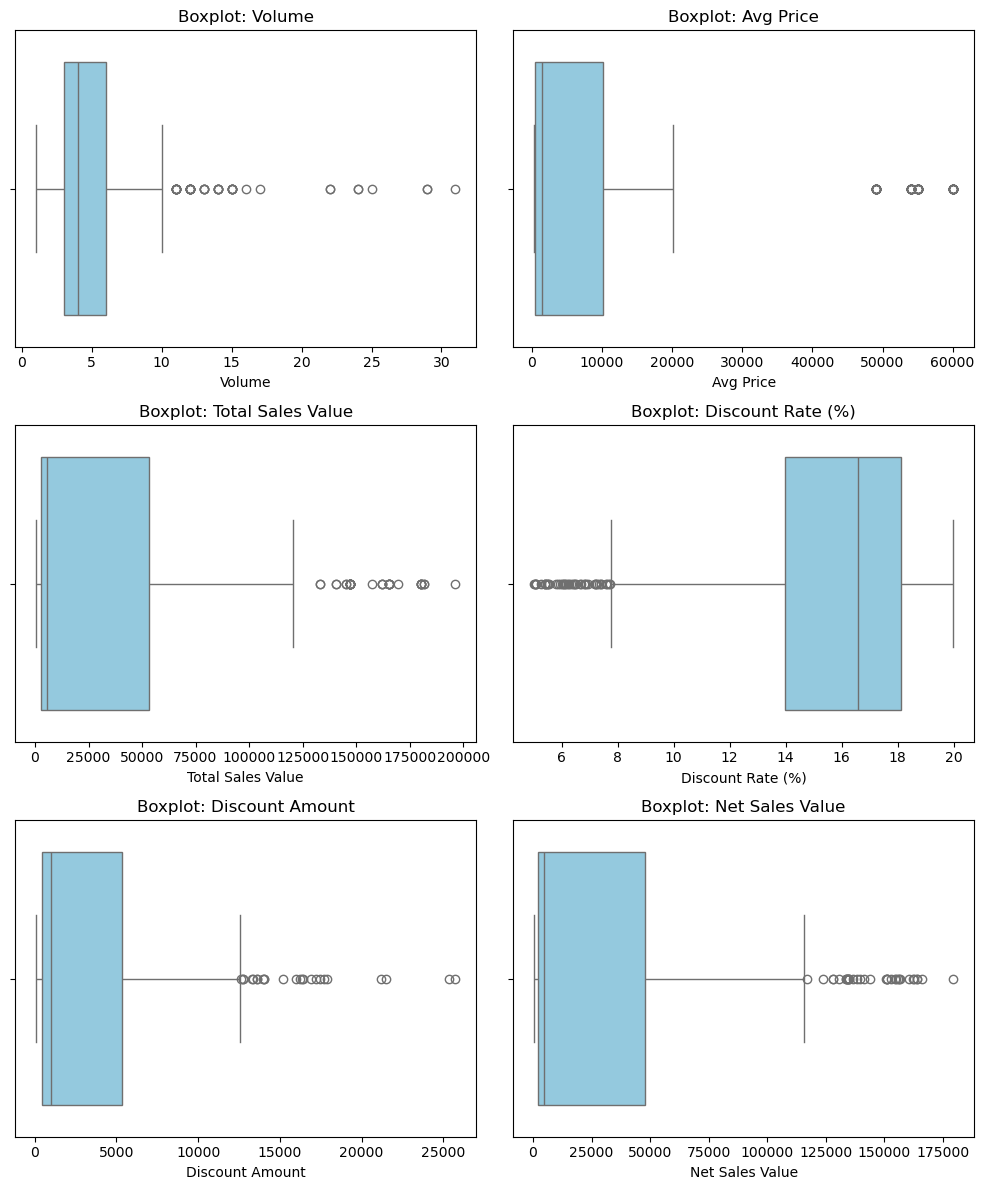


Outlier counts (1.5*IQR rule):
Volume: 44 outliers
Avg Price: 60 outliers
Total Sales Value: 36 outliers
Discount Rate (%): 45 outliers
Discount Amount: 24 outliers
Net Sales Value: 35 outliers


In [14]:
# Boxplots for Numerical Columns
plt.figure(figsize=(5*cols, 4*rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

print("\nOutlier counts (1.5*IQR rule):")
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


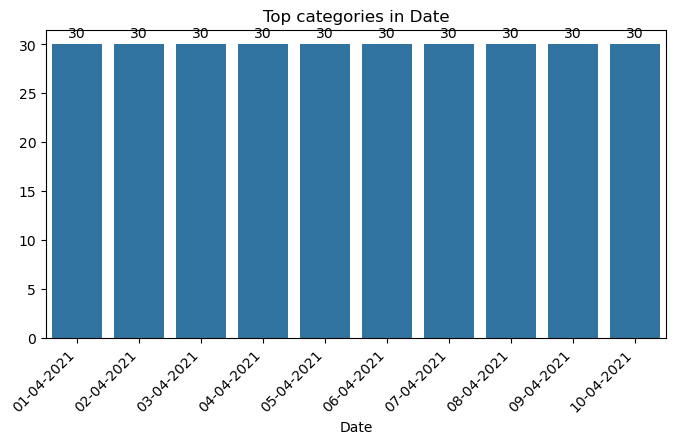

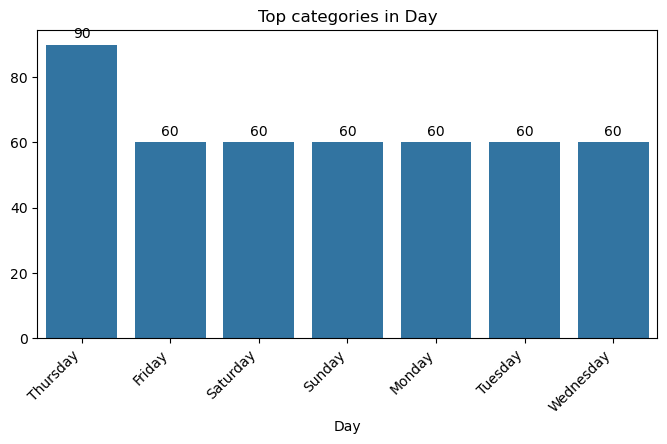

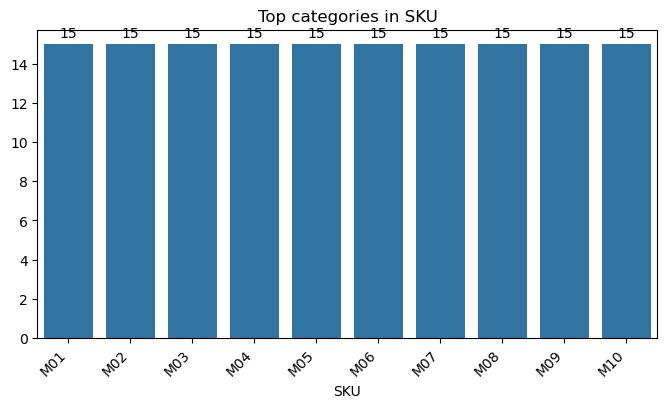

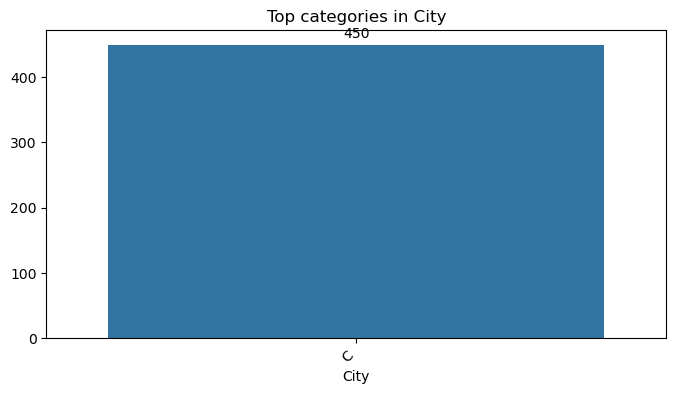

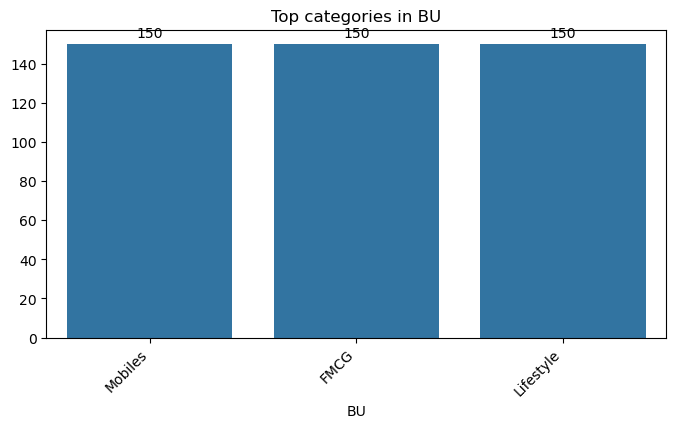

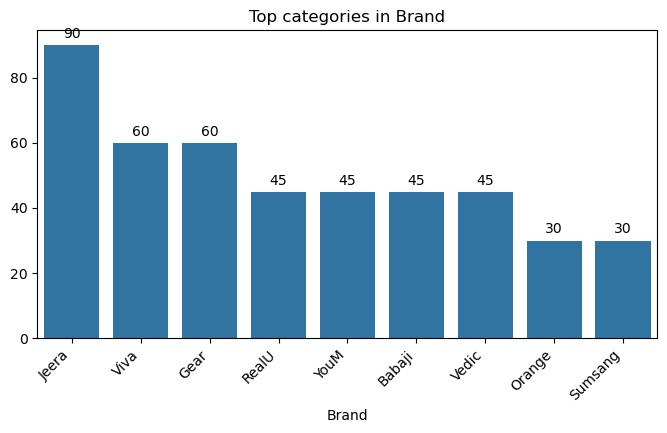

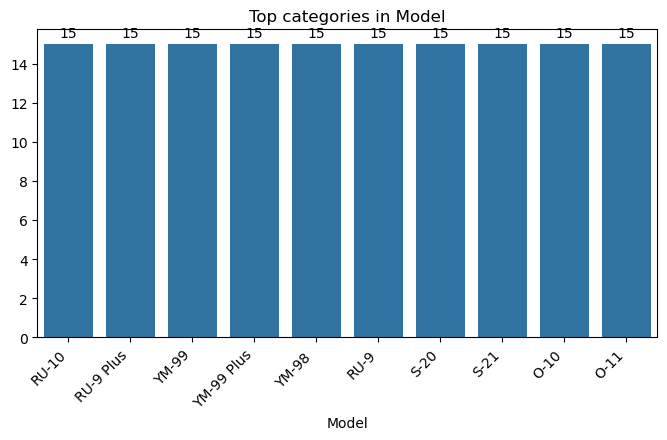


Interpretation:
- Bar charts show category frequencies.
- If one category dominates, dataset may be imbalanced.


In [15]:
# Bar Charts for Categorical Columns
for col in cat_cols:
    counts = df[col].value_counts().head(10)
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=counts.index, y=counts.values)
    ax.bar_label(ax.containers[0], padding=3)
    plt.title(f"Top categories in {col}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

print("\nInterpretation:")
print("- Bar charts show category frequencies.")
print("- If one category dominates, dataset may be imbalanced.")


In [16]:
# Standardization (Z-score normalization)
scaler = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler.fit_transform(df_std[num_cols])

print("Before Standardization (mean/std):")
display(df[num_cols].agg(["mean","std"]).T)

print("\nAfter Standardization (mean/std):")
display(df_std[num_cols].agg(["mean","std"]).T.round(2))

print("\nInterpretation:")
print("- After scaling, all numeric features have mean≈0 and std≈1.")
print("- Ensures fair comparison between variables in ML models.")


Before Standardization (mean/std):


,mean,std
Volume,5.066667,4.231602
Avg Price,10453.433333,18079.904840
Total Sales Value,33812.835556,50535.074173
Discount Rate (%),15.155242,4.220602
Discount Amount,3346.499424,4509.902963
Net Sales Value,30466.336131,46358.656624



After Standardization (mean/std):


,mean,std
Volume,0.0,1.0
Avg Price,0.0,1.0
Total Sales Value,0.0,1.0
Discount Rate (%),-0.0,1.0
Discount Amount,-0.0,1.0
Net Sales Value,0.0,1.0



Interpretation:
- After scaling, all numeric features have mean≈0 and std≈1.
- Ensures fair comparison between variables in ML models.


In [17]:
# Dummy Variables (One-hot Encoding)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
display(df_encoded.head())

print("\nInterpretation:")
print("- One-hot encoding converts categorical text into numeric 0/1 values.")
print("- drop_first=True prevents redundancy (dummy variable trap).")


Original shape: (450, 13)
Encoded shape: (450, 94)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0



Interpretation:
- One-hot encoding converts categorical text into numeric 0/1 values.
- drop_first=True prevents redundancy (dummy variable trap).


In [18]:
# Conclusion
print("Conclusion:")
print("- Descriptive stats revealed central tendency and spread of numeric features.")
print("- Histograms showed skewness; boxplots highlighted outliers.")
print("- Bar charts revealed category dominance patterns.")
print("- Standardization put numeric features on the same scale.")
print("- One-hot encoding transformed categorical variables for ML readiness.")
print("\nData preprocessing ensures dataset is clean, consistent, and suitable for analysis & machine learning.")


Conclusion:
- Descriptive stats revealed central tendency and spread of numeric features.
- Histograms showed skewness; boxplots highlighted outliers.
- Bar charts revealed category dominance patterns.
- Standardization put numeric features on the same scale.
- One-hot encoding transformed categorical variables for ML readiness.

Data preprocessing ensures dataset is clean, consistent, and suitable for analysis & machine learning.
